In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

from os import listdir
from prettytable import PrettyTable
import mplcyberpunk

plt.style.use("cyberpunk")

font = {'size': 16}
plt.rc('font', **font)

ModuleNotFoundError: No module named 'prettytable'

In [11]:
files = sorted([x for x in listdir('./') if x.split('.')[-1]=='txt'])

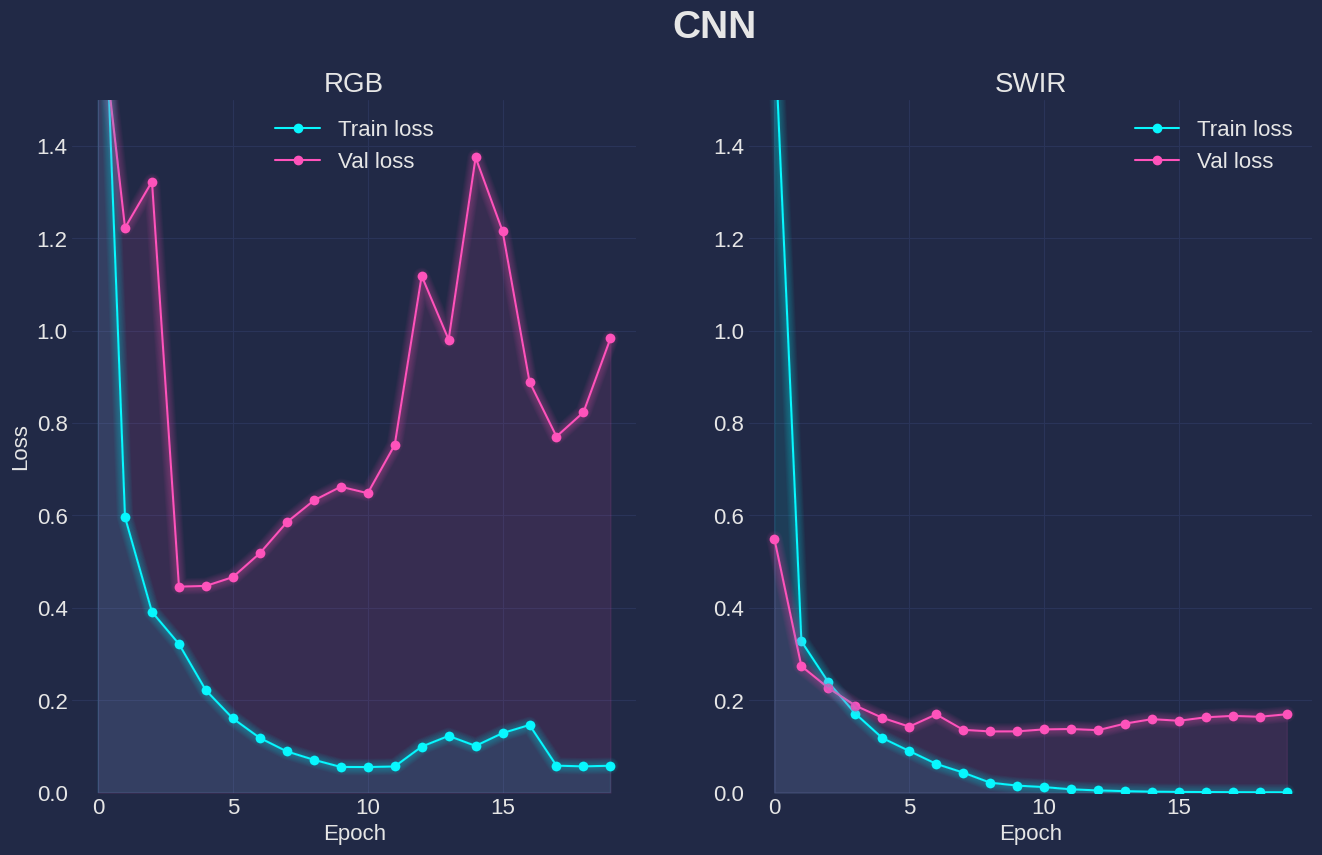

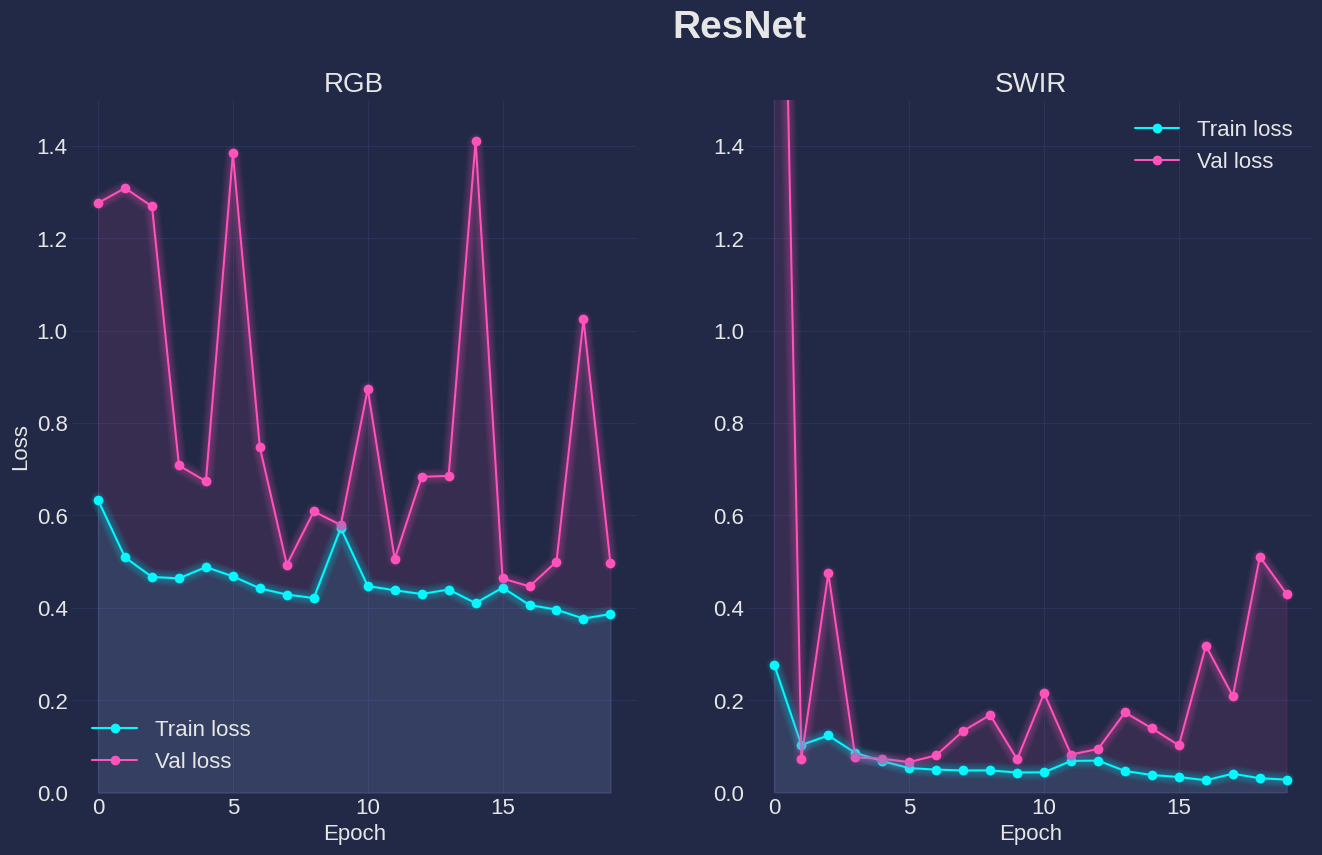

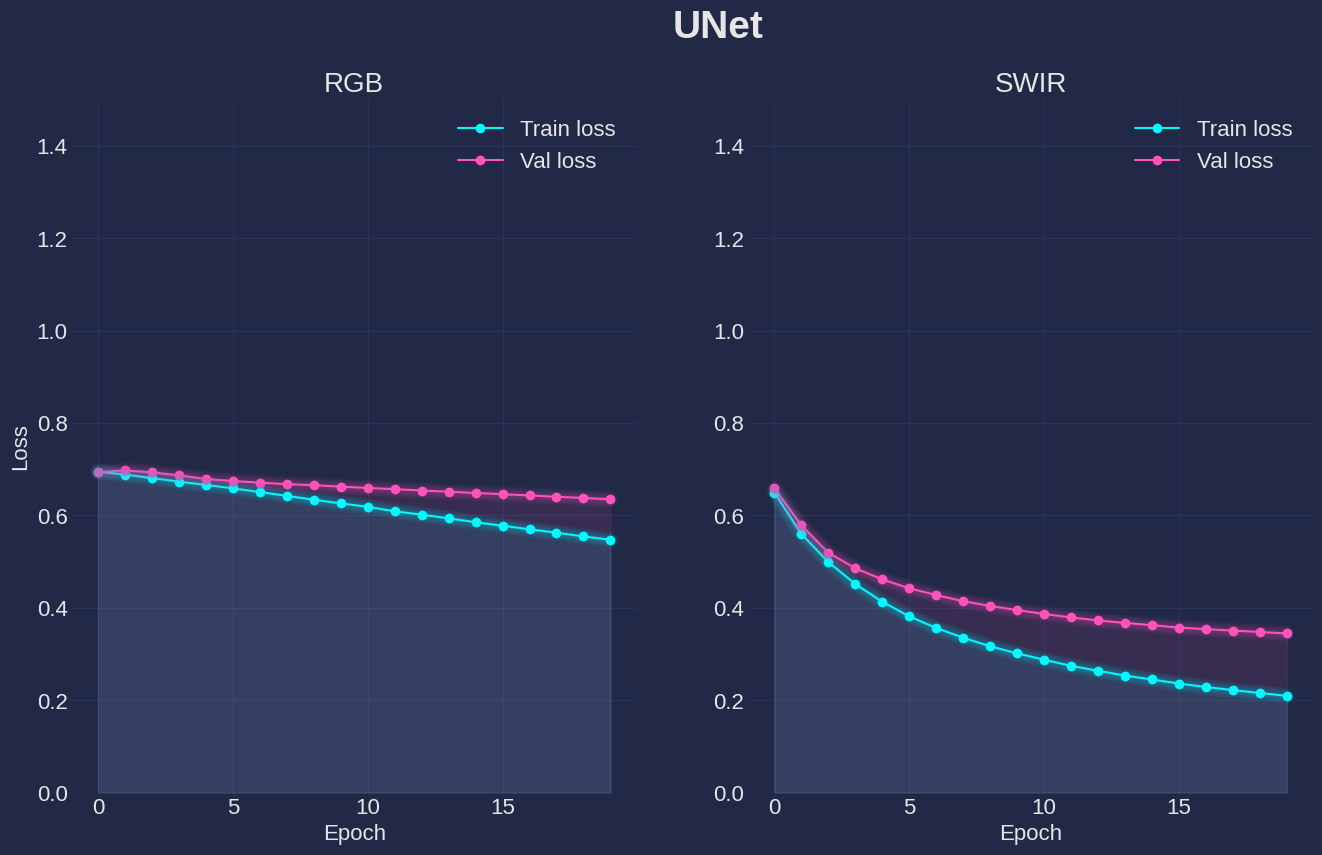

In [48]:
for m in ['CNN', 'ResNet', 'UNet']:
    train, test = {}, {}
    for kind in ['RGB', 'SWIR']:
        train[kind] = np.loadtxt(f'{m}_{kind}_train_loss.txt')
        test[kind] = np.loadtxt(f'{m}_{kind}_val_loss.txt')
    fig, ax = plt.subplots(1,2, figsize=(16,9))
    ax[0].plot(train['RGB'], marker='o', label = 'Train loss')
    ax[0].plot(test['RGB'], marker='o', label = 'Val loss')
    ax[0].set_ylim(0,1.5)
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[0].legend()
    ax[0].set_title('RGB', fontsize=20)
    
    mplcyberpunk.add_glow_effects(ax=ax[0])
    ax[1].plot(train['SWIR'], marker='o', label = 'Train loss')
    ax[1].plot(test['SWIR'], marker='o', label = 'Val loss')
    ax[1].set_ylim(0,1.5)
    ax[1].set_xlabel('Epoch')
    ax[1].legend()
    ax[1].set_title('SWIR', fontsize=20)
    mplcyberpunk.add_glow_effects(ax=ax[1])
    
    fig.suptitle(m, fontweight='bold', fontsize=28, horizontalalignment='left')
    plt.savefig(f'{m}_{kind}.png')
    plt.show()

In [45]:
def validate(pred):
    accuracy = round(accuracy_score(true, pred),3)
    recall = round(recall_score(true, pred),3)
    f1 = round(f1_score(true, pred),3)
    precision = round(precision_score(true, pred),3)
    #print(f"Validation Metrics: Accuracy: {accuracy:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}, F1 Score: {f1:.4f}")
    return [accuracy, recall, precision, f1]

In [28]:
true = np.loadtxt('true.txt')

In [46]:
for kind in ['RGB', 'SWIR']:
    CNN = np.loadtxt(f'./preds/preds_CNN_{kind}.txt')
    ResNet = np.loadtxt(f'./preds/preds_ResNet_{kind}.txt')
    UNet = np.loadtxt(f'./preds/preds_UNet_{kind}.txt')
    
    CNN = validate(CNN)
    ResNet = validate(ResNet)
    UNet = validate(UNet)
    
    scores = PrettyTable()
    scores.title = kind
    scores.field_names = ['Model', "Accuracy", "Recall", "Precision", 'F1 Score']
    scores.add_row(["CNN", CNN[0], CNN[1], CNN[2], CNN[3]])
    scores.add_row(["ResNet", ResNet[0], ResNet[1], ResNet[2], ResNet[3]])
    scores.add_row(["UNet", UNet[0], UNet[1], UNet[2], UNet[3]])
    print(scores)

+---------------------------------------------------+
|                        RGB                        |
+--------+----------+--------+-----------+----------+
| Model  | Accuracy | Recall | Precision | F1 Score |
+--------+----------+--------+-----------+----------+
|  CNN   |  0.801   | 0.836  |    0.78   |  0.807   |
| ResNet |  0.823   | 0.879  |   0.788   |  0.831   |
|  UNet  |  0.652   | 0.486  |   0.723   |  0.581   |
+--------+----------+--------+-----------+----------+
+---------------------------------------------------+
|                        SWIR                       |
+--------+----------+--------+-----------+----------+
| Model  | Accuracy | Recall | Precision | F1 Score |
+--------+----------+--------+-----------+----------+
|  CNN   |  0.943   | 0.957  |   0.931   |  0.944   |
| ResNet |  0.979   | 0.964  |   0.993   |  0.978   |
|  UNet  |  0.865   | 0.843  |   0.881   |  0.861   |
+--------+----------+--------+-----------+----------+


In [ ]:
from prettytable import PrettyTable

scores = PrettyTable()
scores.field_names = ['Model', "Accuracy", "Recall", "Precision", 'F1 Score']
scores.add_row(["CNN", CNN[0], CNN[1], CNN[2], CNN[3]])
scores.add_row(["ResNet", ResNet[0], ResNet[1], ResNet[2], ResNet[3]])
scores.add_row(["UNet", UNet[0], UNet[1], UNet[2], UNet[3]])